# Exploring Census Data
### Looking at demographic, employment, and household income at tract level

In [76]:
## Import Libraries
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [77]:
## Read files
employment_df = gpd.read_file("/Users/annekebrouwer/Documents/GEOG490_venv/Transportation-Access-/data/chicago_census_tract_employment.csv")
employment_df # Source: Illinois Department of Employment Security, Economic Information and Analysis

# Filter the GeoDataFrame to keep only rows where the 'County' column equals 'Cook'
cook_employment_df = employment_df[employment_df['County'] == 'Cook']  
cook_employment_df

,County,County FIPS code,2010 Census Tract Number,Place Name,Total population (2015-2019 ACS 5-year estimates),Time Period,Labor Force,Employed,Unemployed,Unemployment Rate,150% of U.S. rate
69,Cook,031,101.00,Chicago city,"4,599",2020-AA,"2,442","2,187",255,10.4,No
70,Cook,031,102.01,Chicago city,"7,455",2020-AA,"2,973","2,826",147,4.9,No
71,Cook,031,102.02,Chicago city,"2,896",2020-AA,"1,353","1,228",125,9.2,No
72,Cook,031,103.00,Chicago city,"6,485",2020-AA,"3,128","2,889",239,7.6,No
73,Cook,031,104.00,Chicago city,"5,213",2020-AA,"2,599","2,309",290,11.2,No
...,...,...,...,...,...,...,...,...,...,...,...
1383,Cook,031,8438.00,Chicago city,"1,520",2020-AA,755,474,281,37.2,Yes
1384,Cook,031,8439.00,Split Area,"3,430",2020-AA,"1,356","1,213",143,10.5,No
1385,Cook,031,9800.00,Split Area,0,2020-AA,0,0,0,0.0,No
1386,Cook,031,9801.00,Chicago city,0,2020-AA,0,0,0,0.0,No


In [78]:
## Accessing Census data 
from census import Census
import pandas as pd
import matplotlib.pyplot as plt
from us import states

c = Census("5dc8bf38af7b9e4766c7afba29c4ab08c539ec5f")

# Access ACS 5-Year Estimates data for Cook County, Illinois
data = c.acs5.state_county_tract(
    fields=('B02001_001E','B02001_002E',
           'B02001_003E','B02001_004E','B02001_005E','B02001_006E',
            'B02001_007E', 'B02001_008E', 'B19013_001E', 'B23001_001E'),  # Variables in order: RACE (total), White, Black, Native American/ Alaska Native,
                                            # Asian, Native Hawaiian/Pacific Isalnder, other, Two or more races, median houshold income last 12 months, nuumber employed
    state_fips=states.IL.fips,  # FIPS code for Illinois
    county_fips='031',  # FIPS code for Cook County
    tract='*'  # get all tracts
)
data = pd.DataFrame(data)

In [79]:
data = data.rename(columns={'B02001_001E': 'Total_Population',
                            'B02001_002E': 'White',
                            'B02001_003E': 'Black',
                            'B02001_004E': 'Native_American_Alaska_Native',
                            'B02001_005E': 'Asian',
                            'B02001_006E': 'Native_Hawaiian_Pacific_Islander',
                            'B02001_007E': 'Other_Race',
                            'B02001_008E': 'Two_or_More_Races',
                            'B19013_001E': 'Median_Household_Income',
                            'B23001_001E': 'Number_Employed'})
data

,Total_Population,White,Black,Native_American_Alaska_Native,Asian,Native_Hawaiian_Pacific_Islander,Other_Race,Two_or_More_Races,Median_Household_Income,Number_Employed,state,county,tract
0,4534.0,2005.0,1751.0,0.0,81.0,0.0,221.0,476.0,60316.0,3910.0,17,031,010100
1,8232.0,2663.0,3269.0,34.0,365.0,0.0,797.0,1104.0,43750.0,5868.0,17,031,010201
2,3124.0,1206.0,1032.0,37.0,174.0,0.0,558.0,117.0,45096.0,2551.0,17,031,010202
3,6085.0,3057.0,1759.0,59.0,215.0,7.0,716.0,272.0,60846.0,5572.0,17,031,010300
4,4587.0,3619.0,498.0,0.0,240.0,0.0,72.0,158.0,43024.0,4496.0,17,031,010400
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1327,2490.0,118.0,2193.0,0.0,0.0,23.0,16.0,140.0,67634.0,2133.0,17,031,844600
1328,1573.0,114.0,1092.0,0.0,0.0,0.0,222.0,145.0,31898.0,1279.0,17,031,844700
1329,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-666666666.0,0.0,17,031,980000
1330,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-666666666.0,0.0,17,031,980100


In [80]:
## Read data from https://hub-cookcountyil.opendata.arcgis.com/datasets/cookcountyil::cook-county-digital-equity-score-tracts/about
tracts_shp = gpd.read_file("/Users/annekebrouwer/Documents/GEOG490_venv/Transportation-Access-/data/Cook_County_Digital_Equity_Score_Tracts/Cook_County_Digital_Equity_Score_Tracts.shp")
tracts_csv = pd.read_csv("/Users/annekebrouwer/Documents/GEOG490_venv/Transportation-Access-/data/Cook_County_Digital_Equity_Score_Tracts.csv")

# Merge the shapefile and CSV file
tracts_shp['geoid'] = tracts_shp['geoid'].astype(int)
merged_gdf = tracts_shp.merge(tracts_csv, left_on='geoid', right_on='geoid')
cook_county_data = merged_gdf.rename(columns= {"ep_int_bb_c_f_dsl_2021" : "Percent_Broadband_Access",
                            "ep_age_under18_2021" : "Percent_Children_in_Household",
                            "ep_race_not_his_white_2021" : "Percent_white",
                            "ep_race_not_his_black_2021" : "Percent_black",
                            "ep_race_not_his_asian_2021" : "Percent_asian",
                            "ep_race_not_his_other_2021" : "percent_other_race",
                            "ep_race_his_2021" : "Percent_hispanic_latino",
                            "ep_device_desk_lap_2021" : "Percent_computer_in_house",
                            "ep_device_smartphone_o_2021": "Percent_only_smartphone_in_house",
                            "ep_inc_median_2021": "Median_household_income",
                            "ep_int_cellular_o_2021":"Percent_cellular_data_internet_access",
                            "ep_hc_burdened_2021":"Percent_housing_cost_burdened",
                            "ep_edu_bach_higher_2021":"Percent_bcahelors_degree_or_higher",
                            "ep_dis_pop_2021":"percent_with_disability",
                            "ep_lang_2021":"language_proficiency",
                            "ep_age_65_and_over_2021":"percent_65_or_older",
                            "digital_equity_score":"digital_equity_score",
                            "digital_equity_score_n":"digital_equity_score_number",
                            "Shape_Area":"shape_area",
                            "Shape_Length":"shape_length",})
cook_county_data.columns

Index(['OBJECTID_x', 'geoid', 'type_x', 'ep_int_bb_', 'ep_age_und',
       'ep_race_no', 'ep_race__1', 'ep_race__2', 'ep_race__3', 'ep_race_hi',
       'ep_device_', 'ep_devic_1', 'ep_inc_med', 'ep_int_cel', 'ep_hc_burd',
       'ep_edu_bac', 'ep_dis_pop', 'ep_lang_20', 'ep_age_65_', 'digital_eq',
       'digital__1', 'Shape__Are', 'Shape__Len', 'geometry', 'OBJECTID_y',
       'type_y', 'Percent_Broadband_Access', 'Percent_Children_in_Household',
       'Percent_white', 'Percent_black', 'Percent_asian', 'percent_other_race',
       'Percent_hispanic_latino', 'Percent_computer_in_house',
       'Percent_only_smartphone_in_house', 'Median_household_income',
       'Percent_cellular_data_internet_access',
       'Percent_housing_cost_burdened', 'Percent_bcahelors_degree_or_higher',
       'percent_with_disability', 'language_proficiency',
       'percent_65_or_older', 'digital_equity_score',
       'digital_equity_score_number', 'Shape__Area', 'Shape__Length'],
      dtype='object')

<Figure size 1000x1000 with 0 Axes>

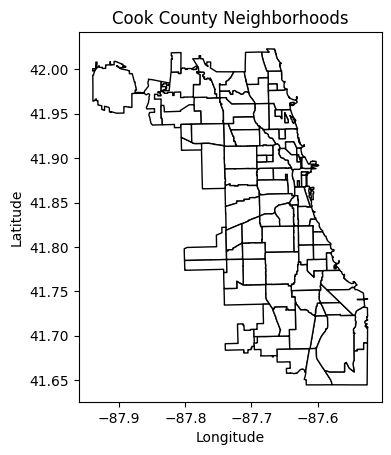

In [81]:
## Lets plot neighborhhoods 
## Read neighborhood shapefile from https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-Neighborhoods/bbvz-uum9
cook_county_neighborhoods = gpd.read_file("/Users/annekebrouwer/Documents/GEOG490_venv/Transportation-Access-/data/Boundaries - Neighborhoods/geo_export_9b52634b-a3ac-4da6-9030-5b5607cf6b40.shp")

# Plot the GeoDataFrame
plt.figure(figsize=(10, 10))
cook_county_neighborhoods.plot(color = 'white', edgecolor = 'black')
plt.title("Cook County Neighborhoods")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()
# Set the CRS for merged_gdf
cook_county_data = cook_county_data.to_crs(epsg=32616)  # Replace 4269 with the appropriate EPSG code for your data

# Set the CRS for cook_county_neighborhoods
cook_county_neighborhoods = cook_county_neighborhoods.to_crs(epsg=32616)  # Replace 4269 with the appropriate EPSG code for your data

merged_gdf = merged_gdf.to_crs(epsg=32616)

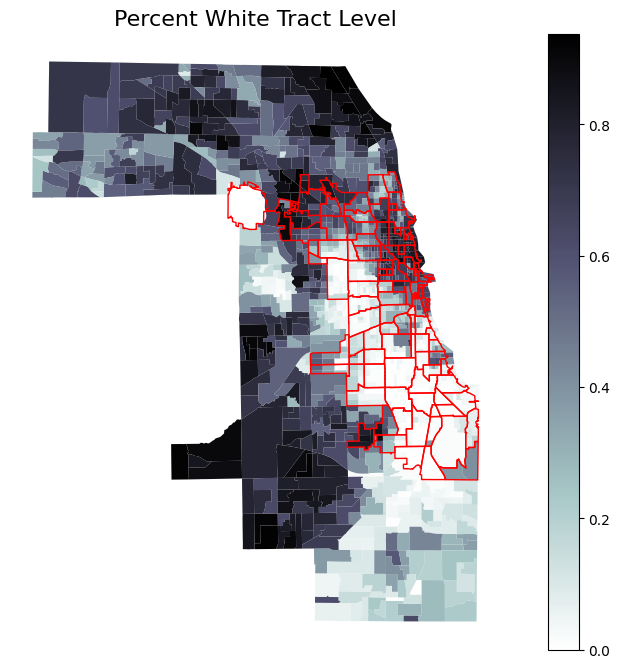

In [82]:
# Create a base map
base = merged_gdf.plot(figsize=(12, 8), color='lightgray', edgecolor='white')

# Plot the variable as a choropleth map
cook_county_data.plot(column='Percent_white', cmap='bone_r', legend=True, ax=base)
cook_county_neighborhoods.boundary.plot(ax=base, color='red', linewidth=1)
# Add title and axis labels
plt.title('Percent White Tract Level', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Remove axes
plt.axis('off')

# Show the map
plt.show()

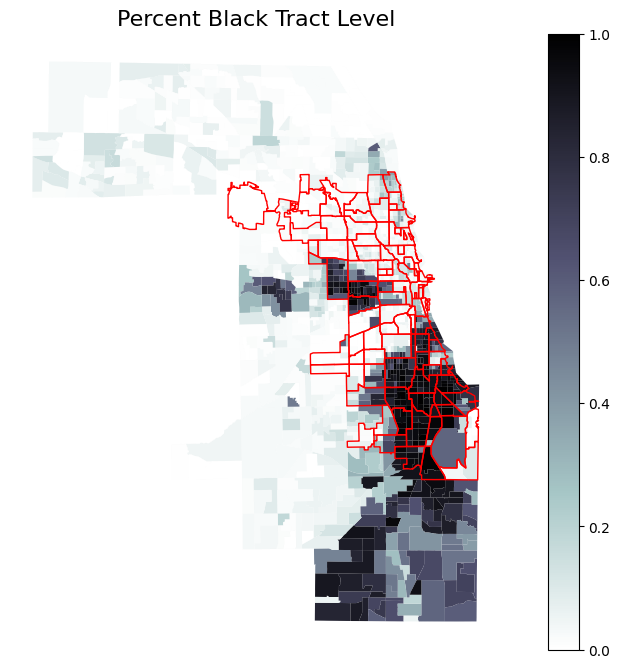

In [83]:
# Create a base map
base = merged_gdf.plot(figsize=(12, 8), color='lightgray', edgecolor='white')

# Plot the variable as a choropleth map
cook_county_data.plot(column='Percent_black', cmap='bone_r', legend=True, ax=base)
cook_county_neighborhoods.boundary.plot(ax=base, color='red', linewidth=1)
# Add title and axis labels
plt.title('Percent Black Tract Level', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Remove axes
plt.axis('off')

# Show the map
plt.show()

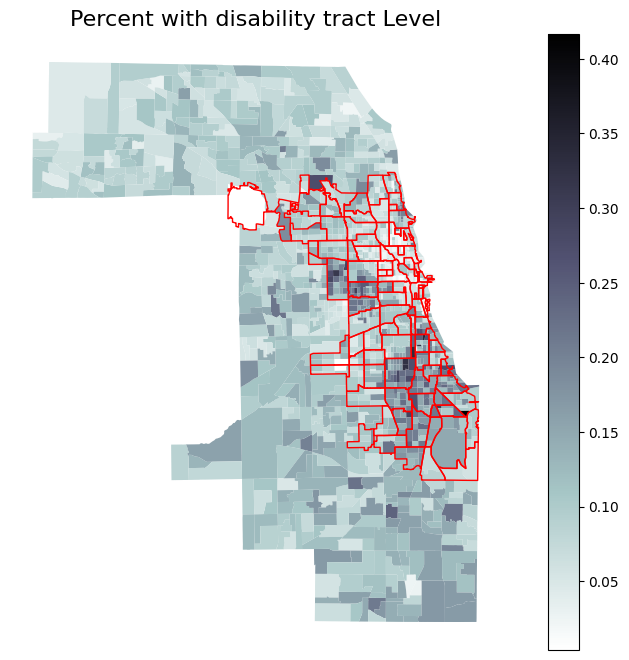

In [84]:
# Create a base map
base = merged_gdf.plot(figsize=(12, 8), color='lightgray', edgecolor='white')

# Plot the variable as a choropleth map
cook_county_data.plot(column='percent_with_disability', cmap='bone_r', legend=True, ax=base)
cook_county_neighborhoods.boundary.plot(ax=base, color='red', linewidth=1)
# Add title and axis labels
plt.title('Percent with disability tract Level', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Remove axes
plt.axis('off')

# Show the map
plt.show()

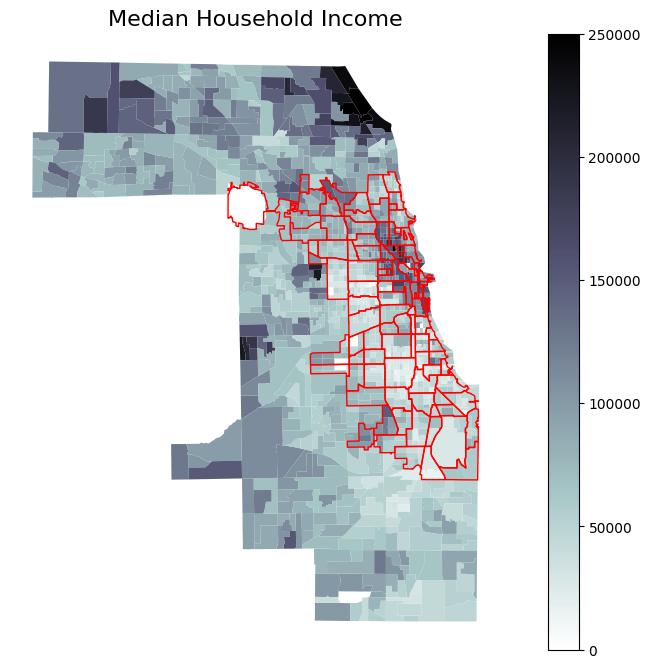

In [85]:
# Create a base map
base = merged_gdf.plot(figsize=(12, 8), color='lightgray', edgecolor='white')

# Plot the variable as a choropleth map
cook_county_data.plot(column='Median_household_income', cmap='bone_r', legend=True, ax=base)
cook_county_neighborhoods.boundary.plot(ax=base, color='red', linewidth=1)
# Add title and axis labels
plt.title('Median Household Income', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Remove axes
plt.axis('off')

# Show the map
plt.show()

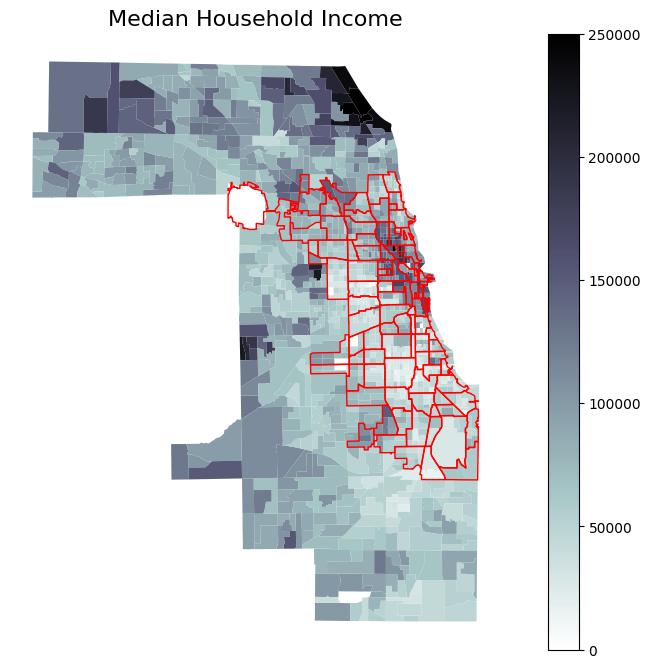

In [86]:
# Create a base map
base = merged_gdf.plot(figsize=(12, 8), color='lightgray', edgecolor='white')

# Plot the variable as a choropleth map
cook_county_data.plot(column='Median_household_income', cmap='bone_r', legend=True, ax=base)
cook_county_neighborhoods.boundary.plot(ax=base, color='red', linewidth=1)
# Add title and axis labels
plt.title('Median Household Income', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Remove axes
plt.axis('off')

# Show the map
plt.show()

In [87]:
## https://www.arcgis.com/home/item.html?id=e413bedf7a984e3787234f992763b3d5
## https://www.smithsonianmag.com/innovation/dozens-us-cities-have-transit-deserts-where-people-get-stranded-180968463/
## LOOK AT THIS TMR